In [240]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

In [241]:
# Read aggrgated data for 2017, remembering it was sampled to include every 400th element.
data = pd.read_csv('data/tripdata_2017.csv', parse_dates=[0, 1], index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 267132 entries, 2001-01-01 23:39:13 to 2017-12-31 23:56:35
Data columns (total 6 columns):
tpep_dropoff_datetime    267132 non-null datetime64[ns]
passenger_count          267132 non-null int64
trip_distance            267132 non-null float64
PULocationID             267132 non-null int64
DOLocationID             267132 non-null int64
fare_amount              267132 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 14.3 MB


## Feature Engineering

Add the following features:
1. Trip duration in seconds
2. Avg speed in mph
3. Day of week
4. Hour of day
5. Month of year
6. Fare per mile (will use to validate for fares)

In [242]:
# Store trip duration in seconds
data['trip_duration'] = (data.tpep_dropoff_datetime - data.index).transform(lambda x: x.total_seconds())

In [243]:
# Calculate avg speed (mph).
data['avg_speed'] = round((3600 * data.trip_distance) / data.trip_duration, 2)

In [244]:
# Create day_dict to use for mapping
day_dict = {0:'Mon', 1:'Tus', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

# Create new feature: day of week
data['day_of_week'] = data.index.weekday.map(day_dict).astype('category')

In [245]:
# Create two new features: hour and month
data['hour_of_day'] = data.index.hour.astype('category')
data['month'] = data.index.month.astype('category')

In [246]:
# Calculate fare charged per mile
data['fare_per_mile'] = round((data.fare_amount) / data.trip_distance, 2)

# Replace positive and negative infinity values with NaN
data.replace(np.inf, np.nan, inplace=True)
data.replace(np.NINF, np.nan, inplace=True)

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 267132 entries, 2001-01-01 23:39:13 to 2017-12-31 23:56:35
Data columns (total 12 columns):
tpep_dropoff_datetime    267132 non-null datetime64[ns]
passenger_count          267132 non-null int64
trip_distance            267132 non-null float64
PULocationID             267132 non-null int64
DOLocationID             267132 non-null int64
fare_amount              267132 non-null float64
trip_duration            267132 non-null float64
avg_speed                266935 non-null float64
day_of_week              267132 non-null category
hour_of_day              267132 non-null category
month                    267132 non-null category
fare_per_mile            266058 non-null float64
dtypes: category(3), datetime64[ns](1), float64(5), int64(3)
memory usage: 21.1 MB


## Remove Uncessary Features
Features we don't need:
1. Pickup time and date
2. Dropoff time and date
3. Pickup Location ID
4. Drop off Location ID

In [208]:
# Drop unnescessary features
to_drop = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID']
data = data.reset_index().drop(to_drop, axis=1)
data.head()

,passenger_count,trip_distance,fare_amount,trip_duration,avg_speed,day_of_week,hour_of_day,month,fare_per_mile
0,1,0.56,11.0,1329.0,1.52,Mon,23,1,19.64
1,1,0.00,2.5,53423.0,0.00,Sat,6,1,NaN
2,1,0.00,1.5,38.0,0.00,Tus,0,1,NaN
3,1,0.90,7.5,540.0,6.00,Wed,17,12,8.33
4,1,0.93,5.5,337.0,9.93,Wed,23,12,5.91


## Feature Cleaning

### Trip Duration

We will limit trip durations from 0 seconds to 3 hours. All other trip durations are outliers or invalid.

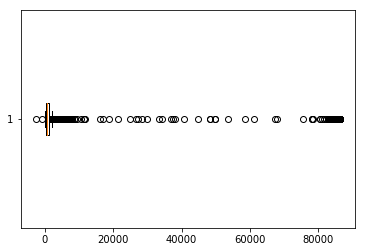

In [209]:
plt.boxplot(data.trip_duration, vert=False)
plt.show()

In [210]:
# Cap trip durations to 3 hours. Remove any negative trip durations.
print('Removing trips with trip durations > 3 hours or < 0 seconds')
print('Dataset size before: ', len(data))
data = data[(data.trip_duration <= 10800) & (data.trip_duration >= 0)] 
print('Dataset size after: ', len(data))

Removing trips with trip durations > 3 hours or < 0 seconds
Dataset size before:  267132
Dataset size after:  266681


### Fare Amount

Limit fare amount from `$0` to $200. All other values are outliers or invalid.

Keep fare amount = $0 because rider may not have came, while driver has started the timer.

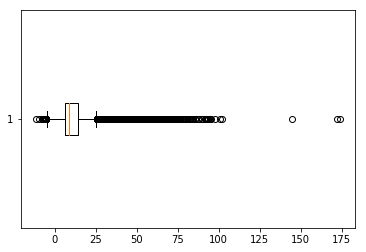

In [211]:
plt.boxplot(data.fare_amount, vert=False)
plt.show()

In [212]:
print('Removing trips with fare amount > $200 or < $0')
print('Dataset size before: ', len(data))
data = data[(data.fare_amount >= 0) & (data.fare_amount <= 200)] 
print('Dataset size after: ', len(data))

Removing trips with fare amount > $250 or < $0
Dataset size before:  266681
Dataset size after:  266569


### Trip Distance


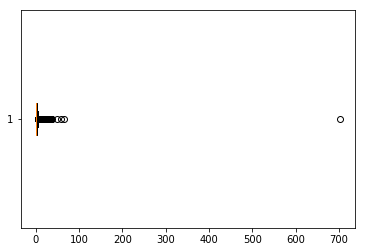

In [213]:
plt.boxplot(data.trip_distance, vert=False)
plt.show()

In [214]:
print('Removing trips with trip distance > 100 miles or < 0 mile')
print('Dataset size before: ', len(data))
data = data[(data.trip_distance >= 0) & (data.trip_distance <= 100)] 
print('Dataset size after: ', len(data))

Removing trips with trip distance > 100 miles or < 0 mile
Dataset size before:  266569
Dataset size after:  266568


In [222]:
# data.hist(figsize=(20, 15))
# plt.show()

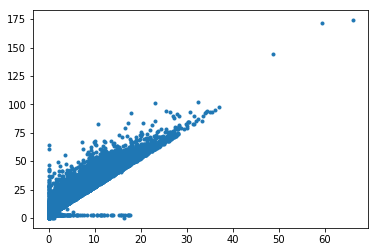

In [227]:
plt.scatter(data.trip_distance, data.fare_amount, marker='.')

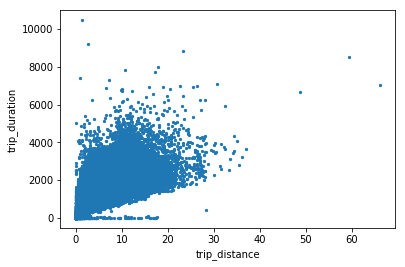

In [225]:
data.plot(kind='scatter', x='trip_distance', y='trip_duration', marker='.')

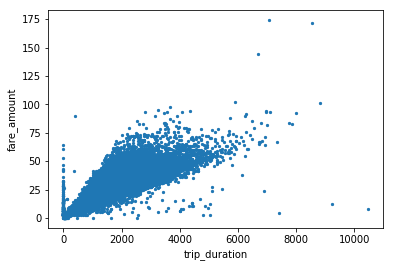

In [228]:
data.plot(kind='scatter', x='trip_duration', y='fare_amount', marker='.')

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266568 entries, 0 to 267131
Data columns (total 9 columns):
passenger_count    266568 non-null int64
trip_distance      266568 non-null float64
fare_amount        266568 non-null float64
trip_duration      266568 non-null float64
avg_speed          266371 non-null float64
day_of_week        266568 non-null category
hour_of_day        266568 non-null category
month              266568 non-null category
fare_per_mile      265514 non-null float64
dtypes: category(3), float64(5), int64(1)
memory usage: 15.0 MB


In [236]:
data[data.avg_speed.isnull()].head()

,passenger_count,trip_distance,fare_amount,trip_duration,avg_speed,day_of_week,hour_of_day,month,fare_per_mile
3471,1,0.0,4.5,0.0,NaN,Fri,6,1,NaN
4255,2,0.0,13.5,0.0,NaN,Sat,0,1,NaN
4567,1,0.0,3.5,0.0,NaN,Sat,13,1,NaN
4825,1,0.0,13.5,0.0,NaN,Sat,19,1,NaN
5710,1,0.0,3.5,0.0,NaN,Mon,5,1,NaN
